# Imports

In [45]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import sys
import copy
import pickle
from sklearn.metrics import normalized_mutual_info_score
from scipy.sparse.csgraph import connected_components
from data_plotting import scatter_plot_matrix, plot_3D_data
import time
import os


sys.path.append('/home/nico/VSCodeRepos/SigMA/')
from SigMA.SigMA import SigMA
from velocity_testing.velocity_test import VelocityTester
from NoiseRemoval.RemoveNoiseTransformed import remove_noise_simple
from generate_data import DataGenerator

# Test Cases Overview & Summary

In [7]:
# contains true split
test_case_1 = [
    {
        'clusters': [0, 1],
        'mu_position': [
            [-500, -500, 20],
            [-490, -490, 35]
        ],
        'mu_std': [
            np.array([3, 5, 2]),
            np.array([4, 8, 2])
        ]
    }
]

# contains true split
test_case_2 = [
    {
        'clusters': [0, 2],
        'mu_position': [
            [20, 40, 150],
            [20, 40, 150]
        ],
        'mu_std': [
            np.array([7, 5, 4]),
            np.array([6, 5, 5])
        ]
    }
]

# contains true split
test_case_3 = [
    {
        'clusters': [0, 3],
        'mu_position': [
            [-20, 40, 160],
            [-20, 40, 140]
        ],
        'mu_std': [
            np.array([5, 7, 3]),
            np.array([4, 5, 3])
        ]
    }
]

# contains true split
test_case_4 = [
    {
        'clusters': [0, 4],
        'mu_position': [
            [-20, 300, 160],
            [-20, 300, 150]
        ],
        'mu_std': [
            np.array([4, 3, 4]),
            np.array([6, 5, 4])
        ]
    }
]

# contains true split
test_case_5 = [
    {
        'clusters': [0, 5],
        'mu_position': [
            [-20, 300, 170],
            [-20, 300, 170]
        ],
        'mu_std': [
            np.array([4, 3, 4]),
            np.array([6, 5, 4])
        ]
    }
]

# contains a few noise splits
test_case_6 = [
    {
        'clusters': [1, 2],
        'mu_position': [
            [-30, -150, 180],
            [-30, -150, 160]
        ],
        'mu_std': [
            np.array([4, 2, 4]),
            np.array([6, 6, 4])
        ]
    }
]

# contains a true split
test_case_7 = [
    {
        'clusters': [1, 3],
        'mu_position': [
            [-30, 150, 180],
            [-30, 150, 160]
        ],
        'mu_std': [
            np.array([5, 7, 7]),
            np.array([4, 4, 7])
        ]
    }
]

# contains a true split
test_case_8 = [
    {
        'clusters': [1, 4],
        'mu_position': [
            [200, -150, 0],
            [200, -170, 0]
        ],
        'mu_std': [
            np.array([3, 3, 3]),
            np.array([7, 7, 7])
        ]
    }
]

# contains a true split
test_case_9 = [
    {
        'clusters': [1, 5],
        'mu_position': [
            [100, 200, -150],
            [100, 200, -150]
        ],
        'mu_std': [
            np.array([3, 3, 3]),
            np.array([7, 7, 7])
        ]
    }
]

# contains a true split
test_case_10 = [
    {
        'clusters': [2, 3],
        'mu_position': [
            [-100, 200, -150],
            [-100, 200, -150]
        ],
        'mu_std': [
            np.array([4, 4, 3]),
            np.array([7, 5, 7])
        ]
    }
]

# contains a true split and 2 noise splits
test_case_11 = [
    {
        'clusters': [2, 4],
        'mu_position': [
            [-100, 300, -150],
            [-100, 300, -150]
        ],
        'mu_std': [
            np.array([7, 7, 7]),
            np.array([7, 7, 7])
        ]
    }
]

# contains 5 noise spilts
test_case_12 = [
    {
        'clusters': [2, 5],
        'mu_position': [
            [-100, 400, -150],
            [-100, 400, -150]
        ],
        'mu_std': [
            np.array([3, 3, 3]),
            np.array([3, 3, 3])
        ]
    }
]

# contains a few noise splits
test_case_13 = [
    {
        'clusters': [3, 4],
        'mu_position': [
            [270, 200, 300],
            [270, 200, 300]
        ],
        'mu_std': [
            np.array([4, 3, 7]),
            np.array([4, 5, 5])
        ]
    }
]

# contains a few noise splits
test_case_14 = [
    {
        'clusters': [3, 5],
        'mu_position': [
            [260, -100, 200],
            [260, -100, 200]
        ],
        'mu_std': [
            np.array([4, 3, 7]),
            np.array([4, 5, 6])
        ]
    }
]

# can contain a wrong split
test_case_15 = [
    {
        'clusters': [0, 0],
        'mu_position': [
            [260, -90, 200],
            [260, -115, 200]
        ],
        'mu_std': [
            np.array([4, 3, 7]),
            np.array([4, 5, 6])
        ]
    }
]

# can contain a wrong split
test_case_16 = [
    {
        'clusters': [1, 1],
        'mu_position': [
            [120, 20, 200],
            [120, -10, 200]
        ],
        'mu_std': [
            np.array([5, 7, 7]),
            np.array([4, 7, 7])
        ]   
    }
]

# can contain a wrong split
test_case_17 = [
    {
        'clusters': [2, 2],
        'mu_position': [
            [400, 400, 400],
            [360, 400, 400]
        ],
        'mu_std': [
            np.array([7, 7, 4]),
            np.array([7, 7, 4])
        ]   
    }
]

# can contain a wrong split
test_case_18 = [
    {
        'clusters': [3, 3],
        'mu_position': [
            [400, 250, 400],
            [400, 265, 400]
        ],
        'mu_std': [
            np.array([3, 3, 3]),
            np.array([3, 3, 3])
        ]   
    }
]

# can contain a wrong split
test_case_19 = [
    {
        'clusters': [4, 4],
        'mu_position': [
            [-100, 250, 400],
            [-127, 250, 400]
        ],
        'mu_std': [
            np.array([4, 6, 7]),
            np.array([4, 2, 5])
        ]   
    }
]

# can contain a wrong split
test_case_20 = [
    {
        'clusters': [5, 5],
        'mu_position': [
            [200, -350, 150],
            [230, -350, 150]
        ],
        'mu_std': [
            np.array([7, 5, 4]),
            np.array([3, 3, 5])
        ]   
    }
]

# total about:
# - 10 true splits
# - 10 noise splits
# - 5 wrong splits

# combine the test cases
test_cases = test_case_1 + test_case_2 + test_case_3 + test_case_4 + test_case_5 + test_case_6 + test_case_7 + test_case_8 + test_case_9 + test_case_10 + test_case_11 + test_case_12 + test_case_13 + test_case_14 + test_case_15 + test_case_16 + test_case_17 + test_case_18 + test_case_19 + test_case_20

In [4]:
# save test case summary to file
# with open('simulated_data/test_cases.pkl', 'wb') as f:
#     pickle.dump(test_cases, f)

# Data Creation

In [8]:
df_infos = pd.read_csv('/home/nico/VSCodeRepos/bachelor-project-implementation/simulated_data/simulated_cluster_infos.csv')

In [9]:
test_case = test_cases[0]

In [10]:
test_case

{'clusters': [0, 1],
 'mu_position': [[-500, -500, 20], [-490, -490, 35]],
 'mu_std': [array([3, 5, 2]), array([4, 8, 2])]}

In [11]:
cluster_idx = test_case['clusters']

xyz_mean = test_case['mu_position']
xyz_std = test_case['mu_std']

uvw_mean = df_infos[['U', 'V', 'W']].values[cluster_idx, :]
uvw_std =  df_infos[['U_std', 'V_std', 'W_std']].values[cluster_idx, :]

n_samples = df_infos[['n_cluster']].values[cluster_idx, :].astype(int)

In [28]:
data_generator = DataGenerator()
data_generator.generate_data(xyz_mean, uvw_mean, xyz_std, uvw_std, n_samples)
data, labels_true, err_sampler = data_generator.add_noise(n_samples=50000)

Negative parallax values encountered, fixing values...
Dec out of bounds: Performing correction


In [29]:
cols = ['X', 'Y', 'Z']
# cols = ['ra', 'dec', 'parallax']
# cols = ['U', 'V', 'W']
# cols = ['pmra', 'pmdec', 'radial_velocity']
# plot_3D_data(data, xyz_titles=cols, ax_range=[-1000, 1000], labels=labels_true, true_labels=None)

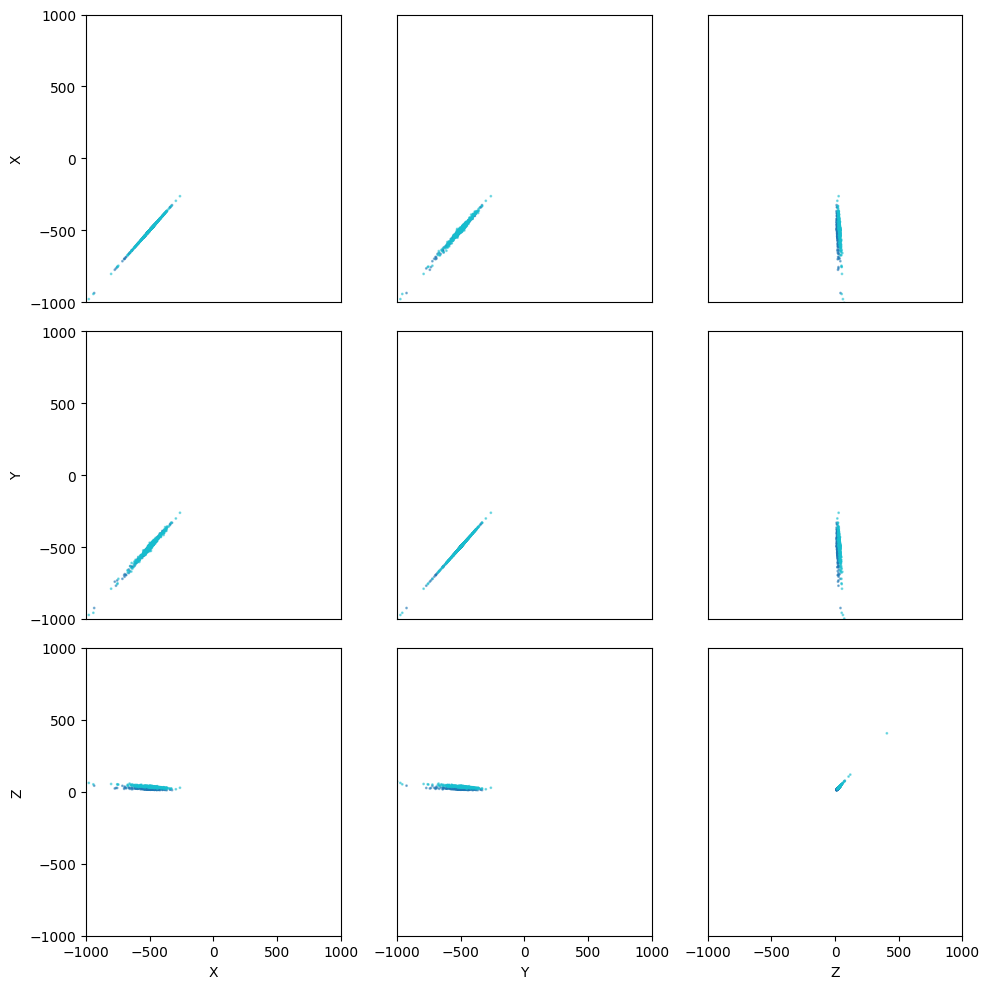

In [30]:
# only plot the true clusters
data_no_noise = copy.deepcopy(data[labels_true != -1])
labels_true_no_noise = copy.deepcopy(labels_true[labels_true != -1])

scatter_plot_matrix(data_no_noise, labels_true_no_noise, cols)

# SigMA Helper Functions

In [31]:
def extract_cluster_single(label_bool_arr, clusterer):
    # Written by Sebastian Ratzenböck
    cluster_bool_array = remove_noise_simple(label_bool_arr, te_obj=clusterer)
    if cluster_bool_array is not None:
        return cluster_bool_array
    else:
        data_idx = np.arange(clusterer.X.shape[0])
        rho = clusterer.weights_[label_bool_arr]
        mad = np.median(np.abs(rho - np.median(rho)))
        threshold = np.median(rho)*0.995 + 3 * mad * 1.05
        # Statistisch fundierterer cut
        # threshold = np.median(rho) + 3 * mad
        idx_cluster = data_idx[label_bool_arr][rho > threshold]
        if len(idx_cluster) > 20:
            # labels_with_noise[idx_cluster] = i
            # Only graph connected points allowed
            _, cc_idx = connected_components(clusterer.A[idx_cluster, :][:, idx_cluster])
            # Combine CCs data points with originally defined dense core (to not miss out on potentially dropped points)
            idx_cluster = data_idx[idx_cluster][cc_idx == np.argmax(np.bincount(cc_idx))]
        
        cluster_bool_array = np.isin(data_idx, idx_cluster)
        return cluster_bool_array
    
def extract_signal(clusterer, labels):
    # Written by Sebastian Ratzenböck
    labels_with_noise = -np.ones(clusterer.X.shape[0], dtype=int)
    for i, u_cl in enumerate(np.unique(labels[labels>-1])):
        cluster_bool_array = extract_cluster_single(labels==u_cl, clusterer)
        labels_with_noise[cluster_bool_array] = i
        
    return labels_with_noise

# Run & Plot SigMA

In [32]:
# cols2fit = ['ra', 'dec', 'parallax', 'pmra', 'pmdec']
cols2fit = ['X', 'Y', 'Z', 'U', 'V']
df_fit = copy.deepcopy(data[cols2fit])

In [19]:
# Scale features
sf = {
    'ra': 1/0.64,
    'dec': 1/0.65,
    'parallax': 1/0.15,
    'pmra': 1/0.49,
    'pmdec': 1/0.57
}
for col in cols2fit:
    df_fit[col] *= sf[col]

KeyError: 'X'

In [33]:
sigma_kwargs = dict(
    cluster_features=cols2fit,
    scale_factors=None,
    # These are the default values and should be kept for now
    nb_resampling=0, max_knn_density=101,
    beta=0.99, knn_initcluster_graph=40,
    transform_function=None
)
clusterer = SigMA(data=df_fit, **sigma_kwargs).fit(alpha=0.01, knn=15, bh_correction=True)

Performing gradient ascend using a 15-NN density estimation.
Updated significance threshold: 1.04e-05


In [34]:
cols = ['X', 'Y', 'Z']
# plot_3D_data(data, xyz_titles=cols, ax_range=[-1000, 1000], labels=clusterer.labels_, true_labels=labels_true)
# plot_3D_data(data, xyz_titles=cols, ax_range=[-1000, 1000], labels=clusterer.labels_, true_labels=None)

# Compute NMI

In [35]:
nmi_data = {}
labels_pred = extract_signal(clusterer, clusterer.labels_)
nmi_data['sigma'] = normalized_mutual_info_score(labels_true, labels_pred)
nmi_data

{'sigma': 0.6362628148665853}

In [36]:
np.unique(labels_true, return_counts=True)

(array([-1,  0,  1]), array([50000,   305,   438]))

In [37]:
np.unique(clusterer.labels_, return_counts=True)

(array([ 33,  38, 437]), array([ 3535,  5621, 41587]))

In [38]:
np.unique(labels_pred, return_counts=True)

(array([-1,  0,  1,  2]), array([50151,   130,   181,   281]))

# Run Test

In [39]:
def produce_baseline(clusterer):
    _, p_values = clusterer.run_sigma(
        alpha=-np.inf, knn=15, return_pvalues=True
    )
    p_values = np.array(p_values)
    pv_sorted = np.sort(p_values[p_values < 0.05])
    # compute mid point between consecutive p-values
    mid_points = (pv_sorted[1:] + pv_sorted[:-1]) / 2
    return mid_points, clusterer.labels_

mid_points, l0 = produce_baseline(clusterer)

In [40]:
# check whether the needed split happens
l0_copy = np.copy(l0)
for alpha_i in mid_points:
    clusterer = clusterer.fit(alpha=alpha_i, knn=15, bh_correction=False)
    l_i = clusterer.labels_
    new_cluster_id = list(set(l_i) - set(l0_copy))
    if len(new_cluster_id) == 1:
        nc_id = new_cluster_id[0]
        part_of_old_cluster = mode(l0_copy[l_i==nc_id], keepdims=False).mode
        print(f'New cluster {nc_id} from old cluster {part_of_old_cluster}')

        # check the true labels of the two clusters
        labels_new, count_new = np.unique(labels_true[l_i==nc_id], return_counts=True)
        labels_old, count_old = np.unique(labels_true[l_i==part_of_old_cluster], return_counts=True)

        print(f'    New cluster labels: {labels_new}, counts: {count_new}')
        print(f'    Old cluster labels: {labels_old}, counts: {count_old}')

    l0_copy = np.copy(l_i)

New cluster 38 from old cluster 437
    New cluster labels: [-1  0  1], counts: [5378   97  146]
    Old cluster labels: [-1  0  1], counts: [41267   125   195]
New cluster 65 from old cluster 33
    New cluster labels: [-1  0  1], counts: [1091   29   34]
    Old cluster labels: [-1  0  1], counts: [2264   54   63]
New cluster 502 from old cluster 38
    New cluster labels: [-1  0  1], counts: [191  14  16]
    Old cluster labels: [-1  0  1], counts: [5187   83  130]
New cluster 591 from old cluster 38
    New cluster labels: [-1  0  1], counts: [339  24  14]
    Old cluster labels: [-1  0  1], counts: [4848   59  116]
New cluster 274 from old cluster 38
    New cluster labels: [-1  0  1], counts: [4432   47   89]
    Old cluster labels: [-1  0  1], counts: [416  12  27]
New cluster 22659 from old cluster 437
    New cluster labels: [-1], counts: [453]
    Old cluster labels: [-1  0  1], counts: [40814   125   195]
New cluster 17486 from old cluster 437
    New cluster labels: [-1], c

In [41]:
def update_labels(labels, label_old, label_new):
    updated_labels = copy.deepcopy(labels)
    updated_labels[labels == label_new] = label_old
    return updated_labels

In [49]:
%reload_ext autoreload
%autoreload 2

test_strategies = [
    #'ttest', 
    #'bootstrap_range_test',
    #'bootstrap_difference_test',
    'xd_mean_distance', 
    'xd_sample_ttest', 
    'xd_mean_distance_sample_distance', 
    'xd_sample_bootstrap_range_test',
    'cbve_mean_distance',
    'cbve_sample_ttest',
    'cbve_mean_distance_sample_distance',
    'cbve_sample_bootstrap_range_test'
]

for i in range(len(test_cases)):
    if i < 2:
        continue

    # create data
    test_case = test_cases[i]
    cluster_idx = test_case['clusters']
    xyz_mean = test_case['mu_position']
    xyz_std = test_case['mu_std']
    uvw_mean = df_infos[['U', 'V', 'W']].values[cluster_idx, :]
    uvw_std =  df_infos[['U_std', 'V_std', 'W_std']].values[cluster_idx, :]
    n_samples = df_infos[['n_cluster']].values[cluster_idx, :].astype(int)
    data_generator = DataGenerator()
    data_generator.generate_data(xyz_mean, uvw_mean, xyz_std, uvw_std, n_samples)
    data, labels_true, err_sampler = data_generator.add_noise(n_samples=50000)

    # copy the data and add labels
    data_copy = copy.deepcopy(data)
    data_copy['labels'] = labels_true

    # create directory to save the test case results
    dir_path = f'/home/nico/Desktop/test_case/test_case{i}'
    os.makedirs(dir_path, exist_ok=True)

    # run sigma
    cols2fit = ['X', 'Y', 'Z', 'U', 'V']
    df_fit = copy.deepcopy(data[cols2fit])
    sigma_kwargs = dict(
        cluster_features=cols2fit,
        scale_factors=None,
        # These are the default values and should be kept for now
        nb_resampling=0, max_knn_density=101,
        beta=0.99, knn_initcluster_graph=40,
        transform_function=None
    )
    clusterer = SigMA(data=df_fit, **sigma_kwargs).fit(alpha=0.01, knn=15, bh_correction=True)

    # produce baseline
    mid_points, l0 = produce_baseline(clusterer)

    # save labels to csv
    cluster_labels = pd.DataFrame({'sigma': l0})


    velocity_tester = VelocityTester(data, clusterer.weights_, 'none', clusterer, err_sampler)
    for test_strat in test_strategies:
        print(f'Running test strategy {test_strat}')
        split_info = []
        iteration = 1
        last_alpha = None
        l0 = cluster_labels['sigma'].values
        velocity_tester.update_testing_mode(test_strat)

        # produce the splits for each alpha
        for alpha_i in mid_points:
            # fit clusterer to new alpha
            clusterer = clusterer.fit(alpha=alpha_i, knn=15, bh_correction=False)
            l_i = clusterer.labels_
            new_clusters_id = list(set(l_i) - set(l0))

            alpha_difference = alpha_i - last_alpha if last_alpha is not None else None
            loop_count = 0
            while len(new_clusters_id) > 1:
                # update alpha to the mean of the mid points
                new_alpha = last_alpha + alpha_difference

                # fit clusterer to new alpha
                clusterer = clusterer.fit(alpha=new_alpha, knn=15, bh_correction=False)
                l_i = clusterer.labels_
                new_clusters_id = list(set(l_i) - set(l0))

                # update alpha difference
                alpha_difference = alpha_difference / 2

                print(f'New alpha: {new_alpha} Last alpha: {last_alpha}, new clusters: {len(new_clusters_id)}')
                loop_count += 1
                if loop_count > 10:
                    break

            if len(new_clusters_id) == 1: 
                # one new cluster was generated
                nc_id = new_clusters_id[0]
                part_of_old_cluster = mode(l0[l_i==nc_id], keepdims=False).mode
                print(f'New cluster {nc_id} from old cluster {part_of_old_cluster}')
                begin = time.time()

                # iterate splits
                l_updated = np.copy(l_i)
                for split in reversed(split_info):
                    if split['same_velocity'] == True:
                        l_updated = update_labels(l_updated, split['old_cluster'], split['new_cluster'])
                        if part_of_old_cluster == split['new_cluster']:
                            print(f'New cluster {nc_id} was updated to old cluster {part_of_old_cluster}')
                            part_of_old_cluster = split['old_cluster']
                        # print(f'New cluster {splits[split]["new_cluster"]} was updated to old cluster {splits[split]["old_cluster"]}')
                            
                # get some information for the report
                labels_nc_id, count_nc_id = np.unique(labels_true[l_updated==nc_id], return_counts=True)
                print(f'New cluster {nc_id} has the following true labels: {labels_nc_id} with counts {count_nc_id}')
                labels_part_of_old_cluster, count_part_of_old_cluster = np.unique(labels_true[l_updated==part_of_old_cluster], return_counts=True)
                print(f'Old cluster {part_of_old_cluster} has the following true labels: {labels_part_of_old_cluster} with counts {count_part_of_old_cluster}')
                
                # if both clusters only have labels -1, skip the velocity test as otherwise testing would take too long
                same_velocity = False
                test_output = 'none'
                if len(labels_nc_id) == 1 and labels_nc_id[0] == -1 and len(labels_part_of_old_cluster) == 1 and labels_part_of_old_cluster[0] == -1:
                    print('Skipping velocity test')
                    same_velocity = True
                    test_output = 'skipped'
                    mean_deviation = 0
                    stats = None
                else:
                    test_output, mean_deviation, stats = velocity_tester.run_test(l_updated, part_of_old_cluster, nc_id, clusterer, return_stats=True)
                    same_velocity = test_output
                    test_output = 'same velocity' if test_output else 'different velocity'

                    # check if the mean_deviation is larger than 10
                    print(mean_deviation)
                    if max(mean_deviation) > 10:
                        same_velocity = True
                        test_output += ' deviation overwrite'



                split_info.append({
                    'new_cluster': nc_id,
                    'old_cluster': part_of_old_cluster,
                    'alpha': alpha_i,
                    'same_velocity': same_velocity,
                    'test_output': test_output,
                    'mean_deviation': mean_deviation,
                    'stats': stats,
                    'labels_nc_id': labels_nc_id,
                    'count_nc_id': count_nc_id,
                    'labels_part_of_old_cluster': labels_part_of_old_cluster,
                    'count_part_of_old_cluster': count_part_of_old_cluster,
                    'runtime': time.time() - begin
                })

                print(f'Test output: {test_output}, same velocity: {same_velocity}, mean deviation: {mean_deviation}')


            else:
                print('No or more than 1 new cluster')
            iteration += 1
            l0 = np.copy(l_i)
            last_alpha = alpha_i
            print('-------------------\n')
        print('--- Finished Testing Strategy ---\n')


        # quicksave the labels to a csv file
        cluster_labels.to_csv(dir_path + '/cluster_labels.csv', index=False)
        # save the split info with pickle
        with open(dir_path + f'/split_info_{test_strat}.pkl', 'wb') as f:
            pickle.dump(split_info, f)

        # compute nmi
        clusterer = clusterer.fit(alpha=mid_points[-1], knn=15, bh_correction=False)  
        labels = clusterer.labels_
        l_updated = np.copy(labels)
        for split in reversed(split_info):
            if split['same_velocity'] == True:
                l_updated = update_labels(l_updated, split['old_cluster'], split['new_cluster'])
        cluster_labels[test_strat] = l_updated

        labels_pred = extract_signal(clusterer, l_updated)
        nmi_data[test_strat] = normalized_mutual_info_score(labels_true, labels_pred)

        # save the nmi data to a csv file
        nmi_df = pd.DataFrame(nmi_data.items(), columns=['strategy', 'nmi'])
        nmi_df.to_csv(dir_path + '/nmi.csv', index=False)

Negative parallax values encountered, fixing values...
Performing gradient ascend using a 15-NN density estimation.
Updated significance threshold: 3.04e-05
Running test strategy xd_mean_distance
No or more than 1 new cluster
-------------------

New cluster 3906 from old cluster 949
New cluster 3906 has the following true labels: [-1  0  1] with counts [ 568   85 1156]
Old cluster 949 has the following true labels: [-1  0  1] with counts [17910   145  2808]
[2.697325601815433, 73.18798886869548]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [2.697325601815433, 73.18798886869548]
-------------------

New cluster 2656 from old cluster 949
New cluster 2656 has the following true labels: [-1  0  1] with counts [17633   110  1442]
Old cluster 949 has the following true labels: [-1  0  1] with counts [ 845  120 2522]
[0.7270863096017588, 0.03800077890006129]
Test output: different velocity, same velocity: False, mean deviation: [0.7270863096017588

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[90.26809983540687, 153.5224549674179]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [90.26809983540687, 153.5224549674179]
-------------------

New cluster 2602 from old cluster 3906
New cluster 2602 was updated to old cluster 3906
New cluster 2602 has the following true labels: [-1  0  1] with counts [244  13 276]
Old cluster 949 has the following true labels: [-1  0  1] with counts [ 601  107 2246]
[2.808786769914314, 210.71911763888178]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [2.808786769914314, 210.71911763888178]
-------------------

New cluster 31700 from old cluster 1
New cluster 31700 has the following true labels: [-1] with counts [1633]
Old cluster 1 has the following true labels: [-1  0  1] with counts [29889    75     1]
[90.26809983540687, 78.1724435945966]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [90.26809983540687, 78.17244359459

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[90.26809983540687, 153.5224549674179]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [90.26809983540687, 153.5224549674179]
-------------------

New cluster 2602 from old cluster 3906
New cluster 2602 was updated to old cluster 3906
New cluster 2602 has the following true labels: [-1  0  1] with counts [244  13 276]
Old cluster 949 has the following true labels: [-1  0  1] with counts [ 601  107 2246]
[2.808786769914314, 210.71911763888178]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [2.808786769914314, 210.71911763888178]
-------------------

New cluster 31700 from old cluster 1
New cluster 31700 has the following true labels: [-1] with counts [1633]
Old cluster 1 has the following true labels: [-1  0  1] with counts [29889    75     1]
[90.26809983540687, 78.1724435945966]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [90.26809983540687, 78.17244359459

/home/nico/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 51462 from old cluster 1
New cluster 51462 has the following true labels: [-1] with counts [261]
Old cluster 1 has the following true labels: [-1  0  1] with counts [31261    75     1]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 2801 from old cluster 3764
New cluster 2801 has the following true labels: [-1  0  1] with counts [117  23 357]
Old cluster 3764 has the following true labels: [-1  0  1] with counts [458  24 473]
[1.9113488242604566, 1.753963254524019]
Test output: different velocity, same velocity: False, mean deviation: [1.9113488242604566, 1.753963254524019]
-------------------

New cluster 2234 from old cluster 2145
New cluster 2234 has the following true labels: [-1  0  1] with counts [96  4 71]
Old cluster 2145 has the fo

/home/nico/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


[1.5168067946575376, 2.6442857638428463]
Test output: different velocity, same velocity: False, mean deviation: [1.5168067946575376, 2.6442857638428463]
-------------------

New cluster 51462 from old cluster 1
New cluster 51462 has the following true labels: [-1] with counts [261]
Old cluster 1 has the following true labels: [-1  0  1] with counts [31261    75     1]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 2801 from old cluster 3764
New cluster 2801 has the following true labels: [-1  0  1] with counts [117  23 357]
Old cluster 3764 has the following true labels: [-1  0  1] with counts [458  24 473]
[1.7018254653934795, 1.5745107465370258]
Test output: different velocity, same velocity: False, mean deviation: [1.7018254653934795, 1.5745107465370258]
-------------------

New cluster 2234 from old cluster 2145
New cluster 2234 has the following true labels: [-1  0  1] with counts

/home/nico/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 51462 from old cluster 1
New cluster 51462 has the following true labels: [-1] with counts [261]
Old cluster 1 has the following true labels: [-1  0  1] with counts [31261    75     1]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 2801 from old cluster 3764
New cluster 2801 has the following true labels: [-1  0  1] with counts [117  23 357]
Old cluster 3764 has the following true labels: [-1  0  1] with counts [458  24 473]
[1.9113488242604566, 1.7583915774456707]
Test output: different velocity, same velocity: False, mean deviation: [1.9113488242604566, 1.7583915774456707]
-------------------

New cluster 2234 from old cluster 2145
New cluster 2234 has the following true labels: [-1  0  1] with counts [96  4 71]
Old cluster 2145 has the 

/home/nico/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


[1014.6298757529236, 684.5733365435041]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1014.6298757529236, 684.5733365435041]
-------------------

New cluster 51462 from old cluster 1
New cluster 51462 has the following true labels: [-1] with counts [261]
Old cluster 1 has the following true labels: [-1  0  1] with counts [31261    75     1]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 2801 from old cluster 3764
New cluster 2801 was updated to old cluster 3764
New cluster 2801 has the following true labels: [-1  0  1] with counts [117  23 357]
Old cluster 949 has the following true labels: [-1  0  1] with counts [18361   207  3607]
[1014.2132459237345, 385.94175066125854]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1014.2132459237345, 385.94175066125854]
-------------------

New cluster 2234 fr

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[96.72727268770826, 0.00868442896302611]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [96.72727268770826, 0.00868442896302611]
-------------------

New cluster 8844 from old cluster 24189
New cluster 8844 was updated to old cluster 24189
New cluster 8844 has the following true labels: [-1] with counts [5453]
Old cluster 142 has the following true labels: [-1  0  1] with counts [43227   195   129]
[96.72727268770826, 84.09946723189339]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [96.72727268770826, 84.09946723189339]
-------------------

New cluster 34453 from old cluster 24189
New cluster 34453 was updated to old cluster 24189
New cluster 34453 has the following true labels: [-1] with counts [670]
Old cluster 142 has the following true labels: [-1  0  1] with counts [48010   195   129]
[96.72727268770826, 77.25471299361465]
Test output: different velocity deviation overwrite, same velocity: True,

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[96.72727268770826, 0.00868442896302611]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [96.72727268770826, 0.00868442896302611]
-------------------

New cluster 8844 from old cluster 24189
New cluster 8844 was updated to old cluster 24189
New cluster 8844 has the following true labels: [-1] with counts [5453]
Old cluster 142 has the following true labels: [-1  0  1] with counts [43227   195   129]
[96.72727268770826, 84.09946723189339]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [96.72727268770826, 84.09946723189339]
-------------------

New cluster 34453 from old cluster 24189
New cluster 34453 was updated to old cluster 24189
New cluster 34453 has the following true labels: [-1] with counts [670]
Old cluster 142 has the following true labels: [-1  0  1] with counts [48010   195   129]
[96.72727268770826, 77.25471299361465]
Test output: different velocity deviation overwrite, same velocity: True,

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[215.2327823158471, 105.73451844435677]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [215.2327823158471, 105.73451844435677]
-------------------

New cluster 30182 from old cluster 302
New cluster 30182 was updated to old cluster 302
New cluster 30182 has the following true labels: [-1] with counts [18247]
Old cluster 81 has the following true labels: [-1  0  1] with counts [27284   293   122]
[217.7076443419673, 218.64015152710954]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [217.7076443419673, 218.64015152710954]
-------------------

New cluster 36575 from old cluster 30182
New cluster 36575 was updated to old cluster 30182
New cluster 36575 has the following true labels: [-1] with counts [486]
Old cluster 81 has the following true labels: [-1  0  1] with counts [45045   293   122]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[262.2474435753871, 0.003160269346044213]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [262.2474435753871, 0.003160269346044213]
-------------------

New cluster 616 from old cluster 2586
New cluster 616 was updated to old cluster 2586
New cluster 616 has the following true labels: [-1  0  1] with counts [ 3 11 52]
Old cluster 3694 has the following true labels: [-1  0  1] with counts [49935   417  3804]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 1885 from old cluster 2244
New cluster 1885 was updated to old cluster 2244
New cluster 1885 has the following true labels: [-1  0  1] with counts [112  21 121]
Old cluster 3694 has the following true labels: [-1  0  1] with counts [49826   407  3735]
[209.25072957297255, 89.70636364996109]
Test output: same velocity deviation overwrite, same velocity: True, mean deviation: [209.25072957297255, 

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[262.2474435753871, 0.003160269346044213]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [262.2474435753871, 0.003160269346044213]
-------------------

New cluster 616 from old cluster 2586
New cluster 616 was updated to old cluster 2586
New cluster 616 has the following true labels: [-1  0  1] with counts [ 3 11 52]
Old cluster 3694 has the following true labels: [-1  0  1] with counts [49935   417  3804]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 1885 from old cluster 2244
New cluster 1885 was updated to old cluster 2244
New cluster 1885 has the following true labels: [-1  0  1] with counts [112  21 121]
Old cluster 3694 has the following true labels: [-1  0  1] with counts [49826   407  3735]
[209.25072957297255, 89.70636364996109]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [209.25072957297

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[173.3829424136271, 94.98034828020978]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [173.3829424136271, 94.98034828020978]
-------------------

New cluster 12200 from old cluster 88
New cluster 12200 was updated to old cluster 88
New cluster 12200 has the following true labels: [-1] with counts [4338]
Old cluster 344 has the following true labels: [-1  0  1] with counts [44384   169    84]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 19534 from old cluster 88
New cluster 19534 was updated to old cluster 88
New cluster 19534 has the following true labels: [-1] with counts [2758]
Old cluster 344 has the following true labels: [-1  0  1] with counts [45964   169    84]
[173.3829424136271, 103.12227256136565]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [173.3829424136271, 103.12227256136565]
------

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[171.89152670514963, 94.98034828020978]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [171.89152670514963, 94.98034828020978]
-------------------

New cluster 12200 from old cluster 88
New cluster 12200 was updated to old cluster 88
New cluster 12200 has the following true labels: [-1] with counts [4338]
Old cluster 344 has the following true labels: [-1  0  1] with counts [44384   169    84]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 19534 from old cluster 88
New cluster 19534 was updated to old cluster 88
New cluster 19534 has the following true labels: [-1] with counts [2758]
Old cluster 344 has the following true labels: [-1  0  1] with counts [45964   169    84]
[173.3829424136271, 103.12227256136565]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [173.3829424136271, 103.12227256136565]
----

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[0.41651091694379316, 49.27619079788713]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [0.41651091694379316, 49.27619079788713]
-------------------

New cluster 15725 from old cluster 261
New cluster 15725 was updated to old cluster 261
New cluster 15725 has the following true labels: [-1] with counts [12198]
Old cluster 400 has the following true labels: [-1  0  1] with counts [37566   389   181]
[0.41613104544655594, 174.87787134358138]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [0.41613104544655594, 174.87787134358138]
-------------------

New cluster 380 from old cluster 400
New cluster 380 has the following true labels: [-1  0  1] with counts [28 25  5]
Old cluster 400 has the following true labels: [-1  0  1] with counts [49736   364   176]
[115.26751867071685, 25.909147310950853]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [115.26751867071685, 

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[0.41651091694379316, 49.27619079788713]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [0.41651091694379316, 49.27619079788713]
-------------------

New cluster 15725 from old cluster 261
New cluster 15725 was updated to old cluster 261
New cluster 15725 has the following true labels: [-1] with counts [12198]
Old cluster 400 has the following true labels: [-1  0  1] with counts [37566   389   181]
[0.41613104544655594, 174.87787134358138]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [0.41613104544655594, 174.87787134358138]
-------------------

New cluster 380 from old cluster 400
New cluster 380 has the following true labels: [-1  0  1] with counts [28 25  5]
Old cluster 400 has the following true labels: [-1  0  1] with counts [49736   364   176]
[115.26751867071685, 25.909147310950853]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [115.26751867071685, 

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[3.1561420726710554, 0.005936520137455082]
Test output: different velocity, same velocity: False, mean deviation: [3.1561420726710554, 0.005936520137455082]
-------------------

New cluster 15497 from old cluster 2239
New cluster 15497 has the following true labels: [-1] with counts [265]
Old cluster 2239 has the following true labels: [-1  0  1] with counts [48798   189  3737]
[3.1561420726710554, 0.024576262361357678]
Test output: different velocity, same velocity: False, mean deviation: [3.1561420726710554, 0.024576262361357678]
-------------------

New cluster 1240 from old cluster 3521
New cluster 1240 was updated to old cluster 3521
New cluster 1240 has the following true labels: [-1  0  1] with counts [25  4 63]
Old cluster 2239 has the following true labels: [-1  0  1] with counts [48773   185  3674]
[2.986114361794155, 153.45221431399716]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [2.986114361794155, 153.45221431399716]
----------

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[185.7243753489448, 42.33753421688077]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [185.7243753489448, 42.33753421688077]
-------------------

New cluster 40517 from old cluster 25342
New cluster 40517 was updated to old cluster 25342
New cluster 40517 has the following true labels: [-1] with counts [232]
Old cluster 331 has the following true labels: [-1  0  1] with counts [48116    94    87]
[186.02088428530814, 71.0642476408219]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [186.02088428530814, 71.0642476408219]
-------------------

New cluster 4565 from old cluster 25342
New cluster 4565 was updated to old cluster 25342
New cluster 4565 has the following true labels: [-1] with counts [3472]
Old cluster 331 has the following true labels: [-1  0  1] with counts [44876    94    87]
[186.02088428530814, 134.69146753669432]
Test output: different velocity deviation overwrite, same velocity: True, m

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[186.02088428530814, (0.009687666528628772+0j)]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [186.02088428530814, (0.009687666528628772+0j)]
-------------------

New cluster 13709 from old cluster 36025
New cluster 13709 was updated to old cluster 36025
New cluster 13709 has the following true labels: [-1] with counts [145]
Old cluster 331 has the following true labels: [-1  0  1] with counts [48203    94    87]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

--- Finished Testing Strategy ---

Running test strategy xd_sample_ttest
No or more than 1 new cluster
-------------------

New cluster 35595 from old cluster 331
New cluster 35595 has the following true labels: [-1] with counts [16252]
Old cluster 331 has the following true labels: [-1  0  1] with counts [32096    94    87]
[165.3572726953072, 201.632063420337]
Test output: different velocity devia

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[185.7243753489448, 42.33753421688077]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [185.7243753489448, 42.33753421688077]
-------------------

New cluster 40517 from old cluster 25342
New cluster 40517 was updated to old cluster 25342
New cluster 40517 has the following true labels: [-1] with counts [232]
Old cluster 331 has the following true labels: [-1  0  1] with counts [48116    94    87]
[186.02088428530814, 71.0642476408219]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [186.02088428530814, 71.0642476408219]
-------------------

New cluster 4565 from old cluster 25342
New cluster 4565 was updated to old cluster 25342
New cluster 4565 has the following true labels: [-1] with counts [3472]
Old cluster 331 has the following true labels: [-1  0  1] with counts [44876    94    87]
[186.02088428530814, 134.69146753669432]
Test output: different velocity deviation overwrite, same velocity: True, m

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[186.02088428530814, (0.009687666528628772+0j)]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [186.02088428530814, (0.009687666528628772+0j)]
-------------------

New cluster 13709 from old cluster 36025
New cluster 13709 was updated to old cluster 36025
New cluster 13709 has the following true labels: [-1] with counts [145]
Old cluster 331 has the following true labels: [-1  0  1] with counts [48203    94    87]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

--- Finished Testing Strategy ---

Running test strategy xd_sample_bootstrap_range_test
No or more than 1 new cluster
-------------------

New cluster 35595 from old cluster 331
New cluster 35595 has the following true labels: [-1] with counts [16252]
Old cluster 331 has the following true labels: [-1  0  1] with counts [32096    94    87]
[547.4527871007193, 2326.6094531287417]
Test output: differe

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[2.0956987836931944, 0.07750105637704334]
Test output: different velocity, same velocity: False, mean deviation: [2.0956987836931944, 0.07750105637704334]
-------------------

New cluster 8896 from old cluster 20345
New cluster 8896 was updated to old cluster 20345
New cluster 8896 has the following true labels: [-1] with counts [139]
Old cluster 263 has the following true labels: [-1  0  1] with counts [48890  3377   235]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 35745 from old cluster 20345
New cluster 35745 was updated to old cluster 20345
New cluster 35745 has the following true labels: [-1] with counts [2585]
Old cluster 263 has the following true labels: [-1  0  1] with counts [46444  3377   235]
[2.0956987836931944, 70.68340192626346]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [2.0956987836931944, 70.68340192626346]
-----------

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[61.48046419597746, 60.040007488562146]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [61.48046419597746, 60.040007488562146]
-------------------

New cluster 39458 from old cluster 6
New cluster 39458 has the following true labels: [-1] with counts [27]
Old cluster 6 has the following true labels: [-1  0  1] with counts [47973   134    86]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 308 from old cluster 6
New cluster 308 has the following true labels: [-1  0  1] with counts [744  25  47]
Old cluster 6 has the following true labels: [-1  0  1] with counts [47256   109    39]
[61.48046419597746, 83.84271558355637]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [61.48046419597746, 83.84271558355637]
-------------------

New cluster 15082 from old cluster 6
New cluster 15082 has the following true la

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[40.80282766352701, 0.002713869455435663]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [40.80282766352701, 0.002713869455435663]
-------------------

New alpha: 0.046169646280220245 Last alpha: 0.04153564644383978, new clusters: 2
New alpha: 0.04385264636203001 Last alpha: 0.04153564644383978, new clusters: 2
New alpha: 0.042694146402934896 Last alpha: 0.04153564644383978, new clusters: 1
New cluster 408 from old cluster 2094
New cluster 408 was updated to old cluster 2094
New cluster 408 has the following true labels: [-1  0  1] with counts [ 5 14  8]
Old cluster 4138 has the following true labels: [-1  0  1] with counts [10907   787  1657]
[2.2218923180407972, 118.24886599298101]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [2.2218923180407972, 118.24886599298101]
-------------------

--- Finished Testing Strategy ---

Running test strategy xd_sample_ttest
No or more than 1 new cluster
---------

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[40.80282766352701, 0.002713869455435663]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [40.80282766352701, 0.002713869455435663]
-------------------

New alpha: 0.046169646280220245 Last alpha: 0.04153564644383978, new clusters: 2
New alpha: 0.04385264636203001 Last alpha: 0.04153564644383978, new clusters: 2
New alpha: 0.042694146402934896 Last alpha: 0.04153564644383978, new clusters: 1
New cluster 408 from old cluster 2094
New cluster 408 was updated to old cluster 2094
New cluster 408 has the following true labels: [-1  0  1] with counts [ 5 14  8]
Old cluster 4138 has the following true labels: [-1  0  1] with counts [10907   787  1657]
[2.2218923180407972, 118.24886599298101]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [2.2218923180407972, 118.24886599298101]
-------------------

--- Finished Testing Strategy ---

Running test strategy xd_sample_bootstrap_range_test
No or more than 1 new cl

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[0.08660136000922038, 0.012712161327350983]
Test output: different velocity, same velocity: False, mean deviation: [0.08660136000922038, 0.012712161327350983]
-------------------

No or more than 1 new cluster
-------------------

--- Finished Testing Strategy ---

Running test strategy xd_sample_ttest
No or more than 1 new cluster
-------------------

New cluster 309 from old cluster 36
New cluster 309 has the following true labels: [-1  0  1] with counts [271  56  57]
Old cluster 36 has the following true labels: [-1  0  1] with counts [48546   120    37]
[0.08856000059252787, 74.88090183088453]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [0.08856000059252787, 74.88090183088453]
-------------------

New cluster 57 from old cluster 312
New cluster 57 has the following true labels: [-1  0  1] with counts [415  53  48]
Old cluster 312 has the following true labels: [-1  0  1] with counts [768  45 132]
[3.3913142228580777, 18.84729191457612]


/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[0.08660136000922038, 0.012712161327350983]
Test output: different velocity, same velocity: False, mean deviation: [0.08660136000922038, 0.012712161327350983]
-------------------

No or more than 1 new cluster
-------------------

--- Finished Testing Strategy ---

Running test strategy xd_sample_bootstrap_range_test
No or more than 1 new cluster
-------------------

New cluster 309 from old cluster 36
New cluster 309 has the following true labels: [-1  0  1] with counts [271  56  57]
Old cluster 36 has the following true labels: [-1  0  1] with counts [48546   120    37]
[955.3559233550117, 410.1231217666912]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [955.3559233550117, 410.1231217666912]
-------------------

New cluster 57 from old cluster 312
New cluster 57 has the following true labels: [-1  0  1] with counts [415  53  48]
Old cluster 312 has the following true labels: [-1  0  1] with counts [768  45 132]
[343.21151144135683, 561.3534

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[78.56735189578173, 77.71258239768781]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [78.56735189578173, 77.71258239768781]
-------------------

No or more than 1 new cluster
-------------------

New cluster 24017 from old cluster 37065
New cluster 24017 was updated to old cluster 37065
New cluster 24017 has the following true labels: [-1] with counts [219]
Old cluster 358 has the following true labels: [-1  0  1] with counts [49072   140   135]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 43656 from old cluster 37065
New cluster 43656 was updated to old cluster 37065
New cluster 43656 has the following true labels: [-1] with counts [2558]
Old cluster 358 has the following true labels: [-1  0  1] with counts [46733   140   135]


/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[78.56735189578173, 94.9784578056618]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [78.56735189578173, 94.9784578056618]
-------------------

New cluster 45512 from old cluster 43656
New cluster 45512 was updated to old cluster 43656
New cluster 45512 has the following true labels: [-1] with counts [649]
Old cluster 358 has the following true labels: [-1  0  1] with counts [48642   140   135]
[78.56735189578173, 50.13665427079896]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [78.56735189578173, 50.13665427079896]
-------------------

New cluster 9153 from old cluster 37065
New cluster 9153 was updated to old cluster 37065
New cluster 9153 has the following true labels: [-1] with counts [485]
Old cluster 358 has the following true labels: [-1  0  1] with counts [48806   140   135]


/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[78.56735189578173, 43.48249418182475]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [78.56735189578173, 43.48249418182475]
-------------------

No or more than 1 new cluster
-------------------

New cluster 1 from old cluster 78
New cluster 1 was updated to old cluster 78
New cluster 1 has the following true labels: [-1  0  1] with counts [72  6  6]
Old cluster 358 has the following true labels: [-1  0  1] with counts [49219   134   129]
[78.56735189578173, 181.6137325664845]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [78.56735189578173, 181.6137325664845]
-------------------

--- Finished Testing Strategy ---

Running test strategy xd_sample_ttest
No or more than 1 new cluster
-------------------

New cluster 179 from old cluster 358
New cluster 179 has the following true labels: [-1  0  1] with counts [48555   120    82]
Old cluster 358 has the following true labels: [-1  0  1] with counts [73

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[78.56735189578173, 77.71258239768781]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [78.56735189578173, 77.71258239768781]
-------------------

No or more than 1 new cluster
-------------------

New cluster 24017 from old cluster 37065
New cluster 24017 was updated to old cluster 37065
New cluster 24017 has the following true labels: [-1] with counts [219]
Old cluster 358 has the following true labels: [-1  0  1] with counts [49072   140   135]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 43656 from old cluster 37065
New cluster 43656 was updated to old cluster 37065
New cluster 43656 has the following true labels: [-1] with counts [2558]
Old cluster 358 has the following true labels: [-1  0  1] with counts [46733   140   135]


/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[78.56735189578173, 94.9784578056618]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [78.56735189578173, 94.9784578056618]
-------------------

New cluster 45512 from old cluster 43656
New cluster 45512 was updated to old cluster 43656
New cluster 45512 has the following true labels: [-1] with counts [649]
Old cluster 358 has the following true labels: [-1  0  1] with counts [48642   140   135]
[78.56735189578173, 50.13665427079896]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [78.56735189578173, 50.13665427079896]
-------------------

New cluster 9153 from old cluster 37065
New cluster 9153 was updated to old cluster 37065
New cluster 9153 has the following true labels: [-1] with counts [485]
Old cluster 358 has the following true labels: [-1  0  1] with counts [48806   140   135]


/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[78.56735189578173, 43.48249418182475]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [78.56735189578173, 43.48249418182475]
-------------------

No or more than 1 new cluster
-------------------

New cluster 1 from old cluster 78
New cluster 1 was updated to old cluster 78
New cluster 1 has the following true labels: [-1  0  1] with counts [72  6  6]
Old cluster 358 has the following true labels: [-1  0  1] with counts [49219   134   129]
[78.56735189578173, 181.6137325664845]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [78.56735189578173, 181.6137325664845]
-------------------

--- Finished Testing Strategy ---

Running test strategy xd_sample_bootstrap_range_test
No or more than 1 new cluster
-------------------

New cluster 179 from old cluster 358
New cluster 179 has the following true labels: [-1  0  1] with counts [48555   120    82]
Old cluster 358 has the following true labels: [-1  0  1] 